In [32]:
import sys
import os

PROJECT_ROOT = os.path.abspath("..")
sys.path.append(PROJECT_ROOT)


In [1]:
import pandas as pd

df = pd.read_csv('../data/raw/T1.csv')
df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [3]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format='%d %m %Y %H:%M')
df = df.sort_values('Date/Time')
df = df.reset_index(drop=True)

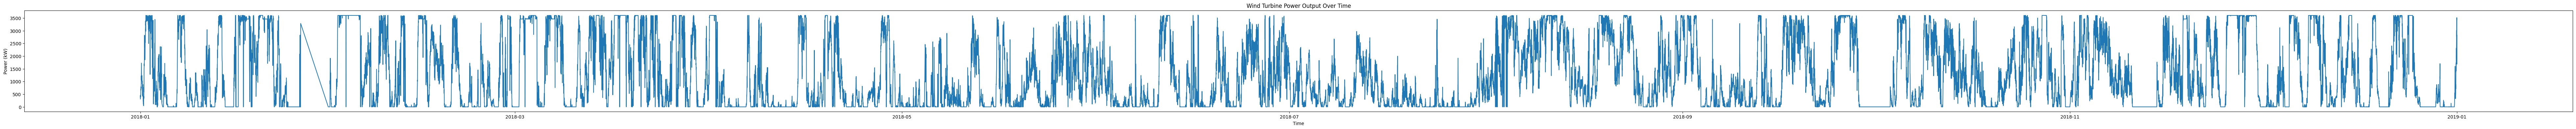

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(100,4))
plt.plot(df["Date/Time"], df["LV ActivePower (kW)"])
plt.title("Wind Turbine Power Output Over Time")
plt.xlabel("Time")
plt.ylabel("Power (kW)")
plt.show()


In [5]:
split_index = int(len(df) * 0.8)

train_df = df.iloc[:split_index]
val_df = df.iloc[split_index:]


In [6]:
from sklearn.preprocessing import MinMaxScaler


scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()


X_train = train_df[['Wind Speed (m/s)']].values
y_train = train_df[["LV ActivePower (kW)"]].values

X_val = val_df[["Wind Speed (m/s)"]].values
y_val = val_df[["LV ActivePower (kW)"]].values

X_train_scaled = scaler_x.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)

X_val_scaled = scaler_x.transform(X_val)
y_val_scaled = scaler_y.transform(y_val)


In [7]:
import joblib

joblib.dump(scaler_x,"../models/scaler_x.pkl")
joblib.dump(scaler_y,"../models/scaler_y.pkl")

['../models/scaler_y.pkl']

In [28]:
from src.data.sequence_builder import create_sequences

LOOKBACK = 24

X_train_seq, y_train_seq = create_sequences(
    X_train_scaled, y_train_scaled, LOOKBACK
)

X_val_seq, y_val_seq = create_sequences(
    X_val_scaled, y_val_scaled, LOOKBACK
)

print(X_train_seq.shape, y_train_seq.shape)


(40400, 24, 1) (40400, 1)
